In [19]:
!pip  install yfinance #Instalar o pacote para analise finaceiro

In [20]:
!pip install fbprophet #Instalar o pacote para o prever usando o FaceBook Prophet

In [21]:
#IMPORTAR AS BIBLIOTECAS 
import yfinance
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
data = yfinance.download('MGLU3.SA', start = '2020-10-01', end = datetime.datetime.today())
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,22.334999,22.975000,22.302500,22.975000,22.934465,45613200
2020-10-02,22.762501,22.945000,21.900000,22.012501,21.973665,59527200
2020-10-05,22.245001,22.674999,22.065001,22.535000,22.495241,48107600
2020-10-06,22.750000,22.799999,22.215000,22.325001,22.285612,42778000
2020-10-07,22.424999,22.692499,22.225000,22.235001,22.195770,41633600
...,...,...,...,...,...,...
2022-04-04,7.350000,7.360000,7.030000,7.190000,7.190000,99313700
2022-04-05,7.170000,7.380000,6.860000,6.910000,6.910000,109998700
2022-04-06,6.810000,6.830000,6.450000,6.620000,6.620000,119018900


In [39]:
df = pd.DataFrame()

In [42]:
df['y'] = data['Close']

In [43]:
df['ds'] = data.index

In [44]:
df

,y,ds
Date,,
2020-10-01,22.975000,2020-10-01
2020-10-02,22.012501,2020-10-02
2020-10-05,22.535000,2020-10-05
2020-10-06,22.325001,2020-10-06
2020-10-07,22.235001,2020-10-07
...,...,...
2022-04-04,7.190000,2022-04-04
2022-04-05,6.910000,2022-04-05
2022-04-06,6.620000,2022-04-06


In [45]:
from fbprophet import Prophet


In [46]:
modelo = Prophet(daily_seasonality = True)



In [47]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


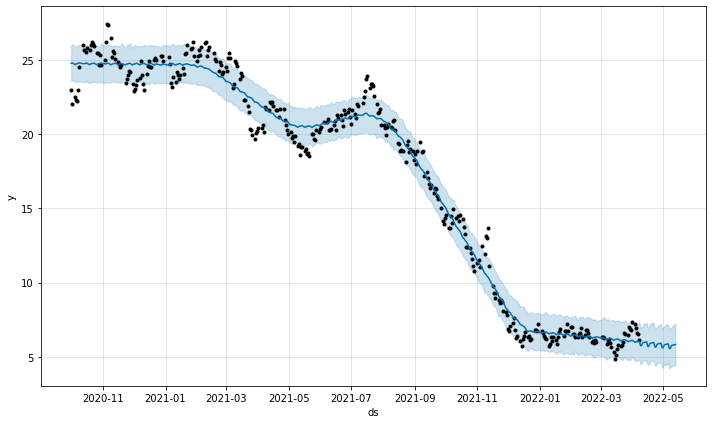

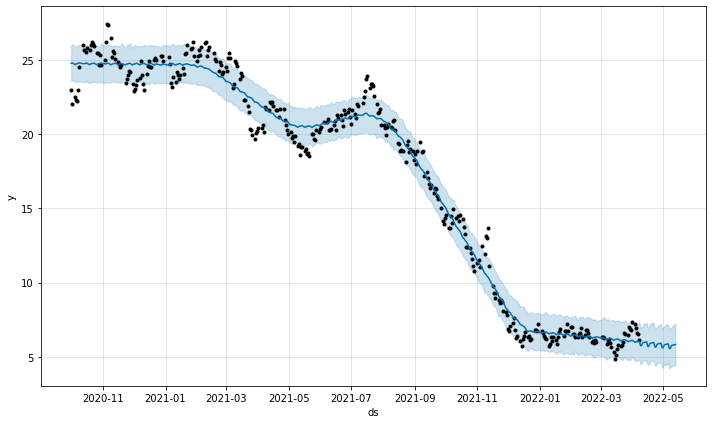

In [48]:
futuro = modelo.make_future_dataframe(periods=35)
predictions = modelo.predict(futuro)
modelo.plot(predictions)

In [49]:
predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
405,2022-05-09,4.300398,4.343619,7.015346,3.900204,4.701188,1.432229,1.432229,1.432229,1.431613,1.431613,1.431613,0.000617,0.000617,0.000617,0.0,0.0,0.0,5.732627
406,2022-05-10,4.293654,4.384486,7.036876,3.866431,4.713549,1.495514,1.495514,1.495514,1.431613,1.431613,1.431613,0.063902,0.063902,0.063902,0.0,0.0,0.0,5.789169
407,2022-05-11,4.286911,4.376331,7.166511,3.840147,4.725146,1.503458,1.503458,1.503458,1.431613,1.431613,1.431613,0.071845,0.071845,0.071845,0.0,0.0,0.0,5.790369
408,2022-05-12,4.280168,4.459118,7.092449,3.815607,4.746124,1.531545,1.531545,1.531545,1.431613,1.431613,1.431613,0.099933,0.099933,0.099933,0.0,0.0,0.0,5.811713
409,2022-05-13,4.273425,4.428324,7.258925,3.790160,4.759295,1.553219,1.553219,1.553219,1.431613,1.431613,1.431613,0.121607,0.121607,0.121607,0.0,0.0,0.0,5.826644
